Name : Raymond Visconti 
NSHE ID : 2001573233

In [112]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy

# Homework 2

This is Homework 2. Please write code in the notebook below that accomplishes the requested tasks. Submit your completed notebook to Canvas as a `.ipynb` file. You should write code in places where you see `...` below.

## Problem 1 (25 points)

The final project for the course will be a visual presentation of a dataset that you analyze. Your presentation will include a description of your dataset, an overview of your chosen analysis method, and some conclusions that you draw from your data. To start working toward this, you should:
- Identify a dataset you would like to work with. It does not have to be explicitly related to an example we have talked about in class. In fact, something related to a hobby, previous work/research experience, or extracurricular activity would be better. This way, you have a personal connection to the data, and can ask interesting questions about it.
- Come up with an interesting research question related to the data. It should be something that's not necessarily obvious about the data (e.g., more complicated than the mean/standard devaition), but also a question that you can quantitatively answer using the data.
- Begin thinking about what analysis methods you might use to help answer this question. Keep in mind that we will cover several more analysis methods before the end of the course, so it doesn't have to be a technique we've already covered. You can also use analysis techniques we have not covered in the course, as long as the method is appropriate for your data and research question.

Please submit 2-3 paragraphs addressing the points above, either in the body of this notebook or an external document. If you have questions, or would like to brainstorm ideas for datasets and/or analysis techniques, feel free to reach out.

**NOTE** All members of the group _may_ work on the same document, and/or submit the same content for this question. This is the _only_ question on the HW on which you and your group mates are allowed to submit the same answer.

Group : Raymond Visconti, Alejandro Rodriquez, Bryce Forrest

Our group has chosen to investigate music recommendations using data sourced from Spotify for our final project. We've identified two datasets that are suitable. The first dataset contains details of 12 million Spotify songs and can be found at:
https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs

The second is a curated list of 160,000 sorted Spotify songs available at:
https://www.kaggle.com/datasets/fcpercival/160k-spotify-songs-sorted/

With these datasets in hand, we intend to address a specific research question: "Is it possible to develop a recommendation system that, when a song is removed from a playlist and subsequently scored as a recommendation, assigns it a high score?" Metrics such as hit ratio and mean reciprocal rank will be used to quantify the system's efficacy. Our group is considering various analysis methods. One approach we are looking into is the matrix factorization of a user-item matrix. Another method involves studying the distribution of each feature in a playlist and scoring a song based on where its features align within that distribution.

Furthermore, we are looking into using machine learning techniques to enhance the song recommendation process. The goal is to use machine learning to refine our recommendation system, allowing it to better interpret and predict user preferences.

## Problem 2 (25 points)

### a. (5 points)
Read in the data located at `problem2.txt`, which contains $x$- and $y$-data (columns `0` and `1`, respectively) and associated uncertainties $\sigma_y$ (column `2`). Make a plot of the data and related uncertainties using `matplotlib.pyplot.errorbar`.

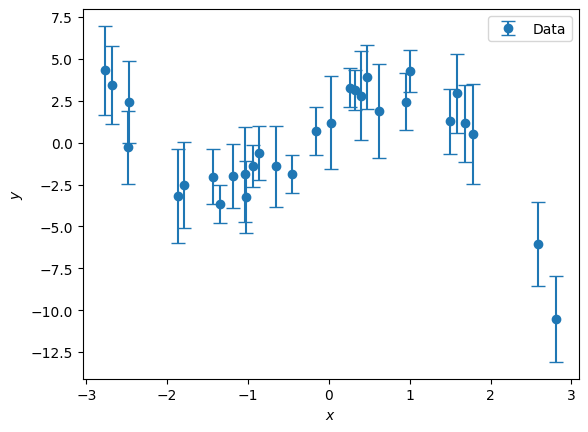

In [113]:
# read in data
mydata = np.loadtxt("problem2.txt")
x = mydata[:, 0]
y = mydata[:, 1]
sigma_y = mydata[:, 2]

# make a plot
fig = plt.figure()
ax = plt.gca()

ax.errorbar(x, y, yerr=sigma_y, fmt='o', capsize=5, label='Data')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.legend()
plt.show()

### b. (10 points)
Build a linear-least squares model for the data assuming a cubic model (i.e., degree 3). Solve the system using `scipy.optimize.lsq_linear`. Print out the best-fit model parameters.

In [114]:
# We are minimizing an equation of the form 0.5 * ||A x - b||**2, where A is our model
# and b is our constraints.

# Let's start by building our matrix A from our data. A should be size (n_points, n_parameters),
# where n_points is the number of points I have, and n_parameters is the number of parameters.
# Note that we can incorporate the uncertainty into our model row-by-row. If you need more
# details, look at the lecture notes and/or Numerical Recipes Chapter 15.

# Define the A matrix incorporating uncertainties.
# We need to multiply each row by the inverse of its corresponding uncertainty.
n_points = len(x)
n_parameters = 4
A = np.zeros((n_points, n_parameters), dtype=np.float64)

for i in range(A.shape[0]):
    # Define each row values based on x values
    row = np.asarray([1, x[i], x[i]**2, x[i]**3])
    # Incorporate uncertainties by scaling the row with the inverse of the uncertainty
    A[i, :] = row / sigma_y[i]

# Define the b vector. 
# Scale y values with the inverse of their uncertainties.
b = y / sigma_y

# Step 4: Solve the system using lsq_linear
result = scipy.optimize.lsq_linear(A, b)

# Print the best-fit model parameters
print("Best-fit parameters:", result.x)

Best-fit parameters: [ 1.32644908  3.77510606 -0.57247145 -0.82467997]


### c. (5 points)
Plot the resulting fit, along with the input data.

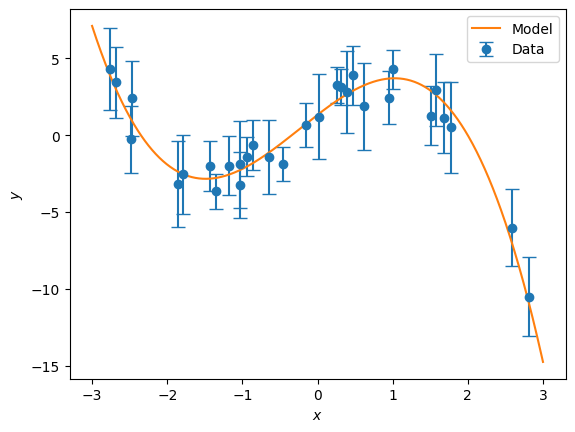

In [115]:
# Add our best-fit data
fig = plt.figure()
ax = plt.gca()

# Plot the data with error bars
ax.errorbar(x, y, yerr=sigma_y, fmt='o', capsize=5, label='Data')

# Generate model values
xvals = np.linspace(-3, 3, num=1000)
yvals = result.x[0] + result.x[1] * xvals + result.x[2] * xvals**2 + result.x[3] * xvals**3
ax.plot(xvals, yvals, label='Model')

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
plt.show()

### d. (5 points)
Compute the goodness-of-fit parameter $Q$ for the data, given the fit and associated uncertainties. Do you think the fit is good?

In [116]:
from scipy.integrate import quad
from scipy.special import gamma

# Compute the chi-square value
chi2_value = np.sum(((y - np.dot(A, result.x)) / sigma_y)**2)

# Compute the number of degrees of freedom
ndf = n_points - n_parameters

# Integrand for the chi2 CDF
def chi2_integrand(x, ndf):
    return x**(ndf/2 - 1) * np.exp(-x/2)

# Compute the CDF of the chi2 distribution
cdf_value, _ = quad(chi2_integrand, 0, chi2_value, args=(ndf,))
# Scale by the gamma function and the power of 2
cdf_value = cdf_value / (gamma(ndf/2) * (2**(ndf/2)))

# Compute the complementary CDF
q = 1 - cdf_value

print("Goodness-of-fit Q:", q)

# Evaluate the fit based on Q
if q > 0.05:
    print("The fit is good.")
else:
    print("The fit is not good.")

Goodness-of-fit Q: 0.6785517460858252
The fit is good.


## Problem 3 (25 points)

The ability to measure distant astronomical objects is limited by the diffraction of light waves as they enter our telescopes. Due to the wave-like nature of light propagation, a photon with a wavelength $\lambda$ passing through a circular aperture is diffracted into a series of concentric rings. The intensity pattern of the light $I(r)$ is given by:
$$
I(r) = \left(\frac{J_1(kr)}{kr}\right)^2,
$$
where $r$ is the distance from the center of the focal plane, $k = 2\pi/\lambda$, and $J_1(x)$ is a Bessel function. The Bessel functions $J_m(x)$ are defined as:
$$
J_m(x) = \frac{1}{\pi} \int_0^\pi \cos(m \theta - x \sin \theta)\;\mathrm{d}\theta,
$$
where $m$ is a non-negative integer and $x \geq 0$.

### a. (10 points)
Write a function that will compute $J_m(x)$ using Simpson's rule with $N = 1000$ points. Use your program to compute the values $J_0$, $J_1$, and $J_2$ over the range $0 \leq x \leq 20$ and plot the result.

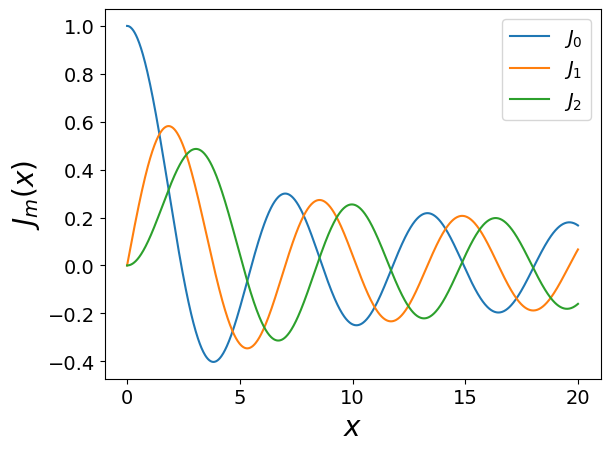

In [117]:
def besselJ(m, x):
    # Define the integrand function
    def integrand(theta):
        return np.cos(m * theta - x * np.sin(theta))
    
    # Break the interval [0, pi] up into 1000 points
    N = 1000
    a, b = 0, np.pi
    h = (b - a) / N
    thetas = np.linspace(a, b, N+1)
    
    # Evaluate the integrand at each point
    yvals = integrand(thetas)
    
    # Use Simpson's rule to calculate the integral
    s = yvals[0] + yvals[-1] + 4 * np.sum(yvals[1:-1:2]) + 2 * np.sum(yvals[2:-1:2])
    integral = h / 3 * s
    
    # Give the answer back to the user
    return (1/np.pi) * integral

# Plot
xvals = np.linspace(0, 20, num=1000)
j0 = np.asarray([besselJ(0, x) for x in xvals])
j1 = np.asarray([besselJ(1, x) for x in xvals])
j2 = np.asarray([besselJ(2, x) for x in xvals])

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, j0, label=r"$J_0$")
ax.plot(xvals, j1, label=r"$J_1$")
ax.plot(xvals, j2, label=r"$J_2$")

# Make plot pretty
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$J_m(x)$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, prop={"size": 14})
plt.show()

### b. (15 points)
Make a plot of the circular intensity pattern with $\lambda = 500$ nm, computed using the formula above. Plot over a region over $0 \leq r \leq 1$ mm. _Note_: it may be helpful to know that $\lim_{x \to 0} J_1(x)/x = 1/2$.

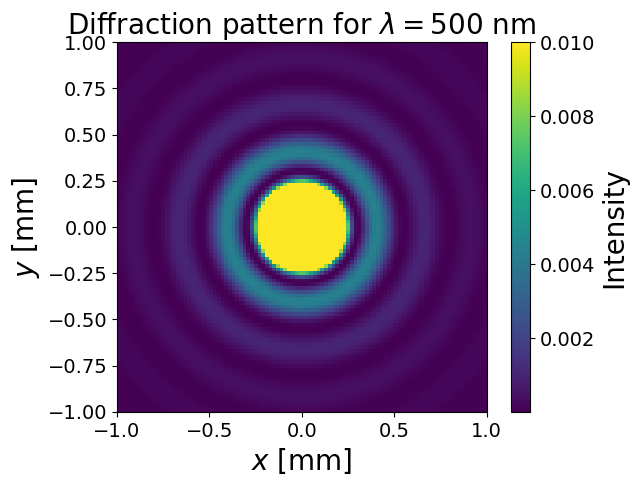

In [118]:
lam = 0.5 

# Define grid of x and y points
x = np.linspace(-1, 1, num=100)  # covering from -1 to 1 mm
y = np.linspace(-1, 1, num=100)
XX, YY = np.meshgrid(x, y)

# Convert to grid of radii
RR = np.sqrt(XX**2 + YY**2)

# Define a function to compute the intensity
def intensity(r, lam):
    # Compute necessary intermediate values
    k = 2 * np.pi / lam
    x = k * r
    if x == 0:  # Handle the singularity at x=0
        return 0.25  # square of (J1(x)/x) = (1/2)^2
    j1 = besselJ(1, x)
    
    # Return the answer to the user
    return (j1 / x)**2

# Compute the intensity using vectorization
ivals = np.vectorize(intensity)(RR, lam)

# Now make a plot
fig = plt.figure()
ax = plt.gca()

# extent defines the values corresponding to the two axes
# vmax defines the maximum value for our colorbar
extent = [-1, 1, -1, 1]
vmax = 0.01
im = ax.imshow(ivals, vmax=vmax, extent=extent)
# add a colorbar
cb = plt.colorbar(im)

# labels
ax.set_xlabel("$x$ [mm]", fontsize=20)
ax.set_ylabel("$y$ [mm]", fontsize=20)
cb.set_label("Intensity", fontsize=20)
ax.set_title(r"Diffraction pattern for $\lambda = 500$ nm", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
cb.ax.tick_params(labelsize=14)

plt.show()

## Problem 4 (25 points)
Suppose I am flipping a coin, and trying to determine the probability that the next outcome will be heads. I flip the coin, and then write down whether it is heads (`1`) or tails (`0`). The coin will come up heads some fraction of the time $f_H$, where a fair coin has $f_H = 1/2$. However, I don't know the value of $f_H$ _a priori_, and instead am trying to infer it based on my past coin tosses.

Using Bayes' Theorem, we can write down the probability of our bias value $f_H$ given our series of observations $\vec{d}$ as:
$$
P\left(f_H | \vec{d}\right) = \frac{P\left(\vec{d} | f_H\right)P(f_H)}{P\left(\vec{d}\right)}.
$$
We can evaluate this given all of our data, or we can incrementally update it based on the output of each of our trials. Let's focus on the latter case.

### a. (2 points)
Read in the data saved at `coin1.txt`. This represents the outcomes of our coin tosses, where "heads" is represented by a `1` and "tails" is represented by a `0`.

In [119]:
with open("coin1.txt", 'r') as file:
    coin1_data = [int(line.strip()) for line in file.readlines()]

### b. (3 points)
Write a pair of functions that will compute the likelihood term $P(\vec{d}|f_H)$. In our case, we are going to focus on the outcome of a single trial, heads or tails, and writing that likelihood in terms of our bias $f_H$. Note that we define our $f_H$ here, which is bound to be between 0 and 1.

In [120]:
# from the gitHub, using complement 
fH = np.linspace(0, 1, num=1000)

def heads_likelihood(fH):
    return fH

def tails_likelihood(fH):
    return 1 - fH

### c. (5 points)
Write a function that will compute the evidence (or normalization) term $P(\vec{d})$. In this case, we just want to make sure our probability is normalized, so we can cheat a bit and implement it as an average of the product of the arrays in our numerator.

In [121]:
def evidence(likelihood, prior):
    return np.sum(likelihood * prior)


### d. (5 points)
Fill in the code below to perform a "Bayesian update" step for the result of each coin flip. We will also be plotting the resulting distribution. We are going to do some special hackery so that our line color changes according to a color map so we can keep track of the evolution of our distribution. We are also going to check that our function remains normalized by doing a numeric integral at each iteration.

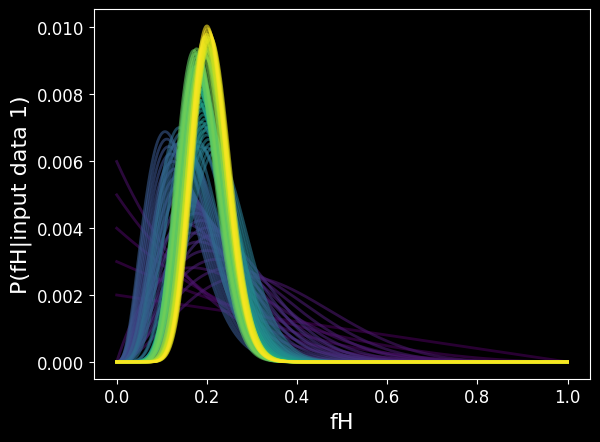

In [122]:
import warnings
from scipy.integrate import quad
warnings.filterwarnings("ignore")

fig = plt.figure(facecolor='black')
ax = plt.gca()

# Set the background color for the figure and axes
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Set the colors of the axes spines
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

# Set the tick colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Define initial flat prior
prior = np.ones_like(fH) / len(fH)

colors = plt.cm.viridis(np.linspace(0, 1, num=len(coin1_data)))

for i, flip in enumerate(coin1_data):
    # Determine if heads or tails
    if flip == 1:
        lik = heads_likelihood(fH)
    else:
        lik = tails_likelihood(fH)

    ev = evidence(lik, prior)
    posterior = lik * prior / ev

    # Plot the posterior with increased line width and alpha
    ax.plot(fH, posterior, alpha=0.6, color=colors[i], linewidth=2)

    # Update the prior
    prior = posterior

ax.set_xlabel('fH', fontsize=16, color='white')
ax.set_ylabel('P(fH|input data 1)', fontsize=16, color='white')
ax.tick_params(which="both", labelsize=12)


### e. (5 points)
Compute the expected value for $f_H$ given the final posterior after all of the coin flips above.

In [123]:
# Function to compute the expected value of fH given the posterior
def compute_ev(posterior):
    return np.sum(fH * posterior)

# Compute and print the expected value for fH
expected_value = compute_ev(posterior)
print(f"Expected value of fH for coin1 data: {expected_value}")

Expected value of fH for coin1 data: 0.20588235294117643


### f. (5 points)
Repeat parts (d) and (e) for the second set of coin flips, `coin2.txt`. What value do you find for $f_H$?

Expected value of fH for coin2 data: 0.6485148514851484


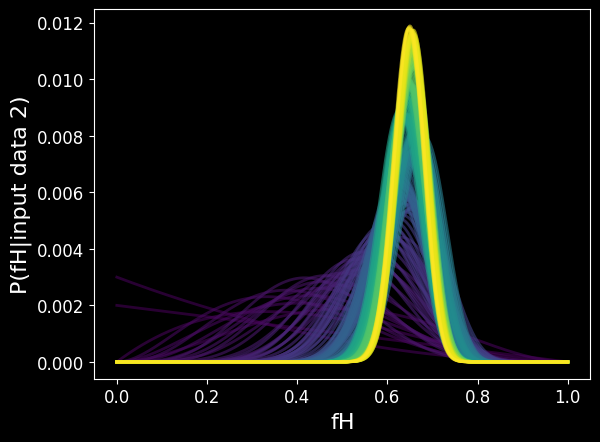

In [124]:
with open("coin2.txt", 'r') as file:
    coin2_data = [int(line.strip()) for line in file.readlines()]

warnings.filterwarnings("ignore")

fig = plt.figure(facecolor='black')
ax = plt.gca()

# Set the background color for the figure and axes
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Set the colors of the axes spines
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

# Set the tick colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Define initial flat prior
prior = np.ones_like(fH) / len(fH)

colors = plt.cm.viridis(np.linspace(0, 1, num=len(coin2_data)))

for i, flip in enumerate(coin2_data):
    # Determine if heads or tails
    if flip == 1:
        lik = heads_likelihood(fH)
    else:
        lik = tails_likelihood(fH)

    ev = evidence(lik, prior)
    posterior = lik * prior / ev

    # Plot the posterior with increased line width and alpha
    ax.plot(fH, posterior, alpha=0.6, color=colors[i], linewidth=2)

    # Update the prior
    prior = posterior

ax.set_xlabel('fH', fontsize=16, color='white')
ax.set_ylabel('P(fH|input data 2)', fontsize=16, color='white')
ax.tick_params(which="both", labelsize=12)

expected_value = compute_ev(posterior)
print(f"Expected value of fH for coin2 data: {expected_value}")